In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from scipy.optimize import curve_fit
from numpy import exp
from numpy import sin
from numpy import tanh

In [149]:
def e(z):
    #return sin(z*5)/2 + 0.5
    return 1-fraction_data[np.where(depth_fraction == z)[0]]

In [18]:
def H(z):
    return -tanh(((c2+c1)*(z-(c2+c1)/2))/(c2-c1))

In [5]:
def l (z,s,a1,b1,a2,b2):
    return e(z)/(1+exp(-a1*s+b1)) + (1-e(z))/(1+exp(-a2*s+b2))

In [6]:
def l_diff(z,s,a1,b1,a2,b2):
    return e(z) * (a1*exp(-a1*s+b1))/(1+exp(-a1*s+b1))**2 + (1-e(z)) * (a2*exp(-a2*s+b2))/(1+exp(-a2*s+b2))**2 

In [17]:
def integral(s,z,a1,a2,b1,b2):
    return H(z-s)*l_diff(z,s,a1,b1,a2,b2)

In [20]:
def functional_integration(z,a1,a2,b1,b2):        
    return quad(integral, 0, z, args=(z,a1,a2,b1,b2))[0]

In [22]:
def get_magnetisation(z,a1,a2,b1,b2):
    vec_expint = np.vectorize(functional_integration)
    M = vec_expint(z,a1,a2,b1,b2)
    
    return tanh(M*10**3)

In [54]:
def plot_barplot(z,M):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5), gridspec_kw={'width_ratios': [3, 1]})
    ax1.plot(M,z)
    ax1.set_ylim(80,70)
    ax1.set_xlim(-1.2,1.2)
    ax1.axvline(0,c='r',linestyle = 'dashed')
    count = 0
    ax2.fill_between(z,0,M[0], facecolor='grey',hatch = '/')
    while(count < M.shape[0]-1):
       ax2.fill_between(z,M[count],M[count+1], facecolor='black')
       count = count+2
    ax2.set_ylim(70,80)
    ax2.set_xlim(0,1)
    ax2.set_xticks([])
    ax2.set_yticks([])
    plt.show()

In [164]:
c1 = 73
c2 = 74

In [73]:
depth_fraction , fraction_data = np.loadtxt('ez.txt', unpack = True)

In [169]:
polarity = np.loadtxt('Kuldara_polarity for Dima.txt')

In [170]:
polarity = polarity[np.logical_not(np.logical_and(polarity[:,1]>-45,polarity[:,1]<45))]

In [171]:
depth, polarity = polarity[:,0],polarity[:,1]

In [172]:
polarity[polarity > 0] = 1
polarity[polarity < 0] = -1

In [119]:
for i in range(1,polarity.shape[0]-1):
    if(polarity[i-1] > 0 and polarity[i+1]>0):
        polarity[i] = 1
    if(polarity[i-1] < 0 and polarity[i+1]<0):
        polarity[i] = -1

In [177]:
popt, pcov = curve_fit(get_magnetisation, depth, polarity, bounds = ([1,3,9,7],[2,5,10,8]))
perr = np.sqrt(np.diag(pcov))

In [178]:
popt

array([1.50295326, 4.005984  , 9.49704444, 7.50297107])

In [179]:
perr

array([2.54383612e+08, 1.07132256e+10, 1.49468509e+09, 1.17396698e+11])

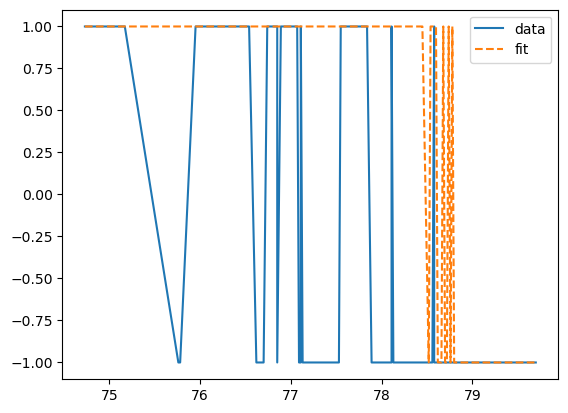

In [180]:
plt.plot(depth,polarity,label = 'data')
plt.plot(depth,get_magnetisation(depth,popt[0],popt[1],popt[2],popt[3]),label = 'fit',linestyle = 'dashed')
plt.legend()
plt.show()

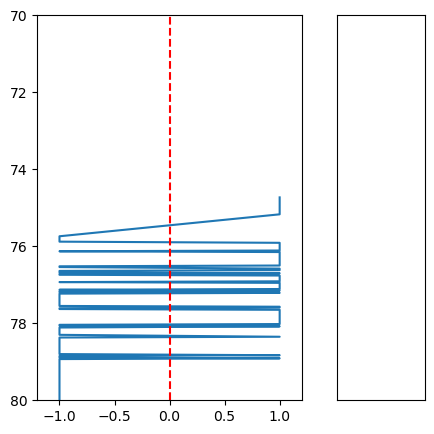

In [59]:
plot_barplot(depth,polarity)